<a href="https://colab.research.google.com/github/minhyuk0914/DL_study/blob/main/ResNet50%20%2B%20ml%20classifier/transfer_learning%2Bml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN_filters + ml
> * Quiz : 이미지를 10가지 항목으로 분류    
* data : fashion_mnist   
* 평가지표 : accuracy_score()

### keras upgrade

In [1]:
!pip install --upgrade keras

In [2]:
# keras 에러 방지
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

### Library import

In [3]:
import random
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *

import keras
from keras.backend import clear_session
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten

In [4]:
keras.__version__

'3.1.1'

### Set Random_seed

In [5]:
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

### Data Load

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
# y - unique
class_n = np.unique(y_train)
class_n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
labels = {0 : 'T-shirt/top',
          1 : 'Trouser',
          2 : 'Pullover',
          3 : 'Dress',
          4 : 'Coat',
          5 : 'Sandal',
          6 : 'Shirt',
          7 : 'Sneaker',
          8 : 'Bag',
          9 : 'Ankle boot' }

print(labels)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

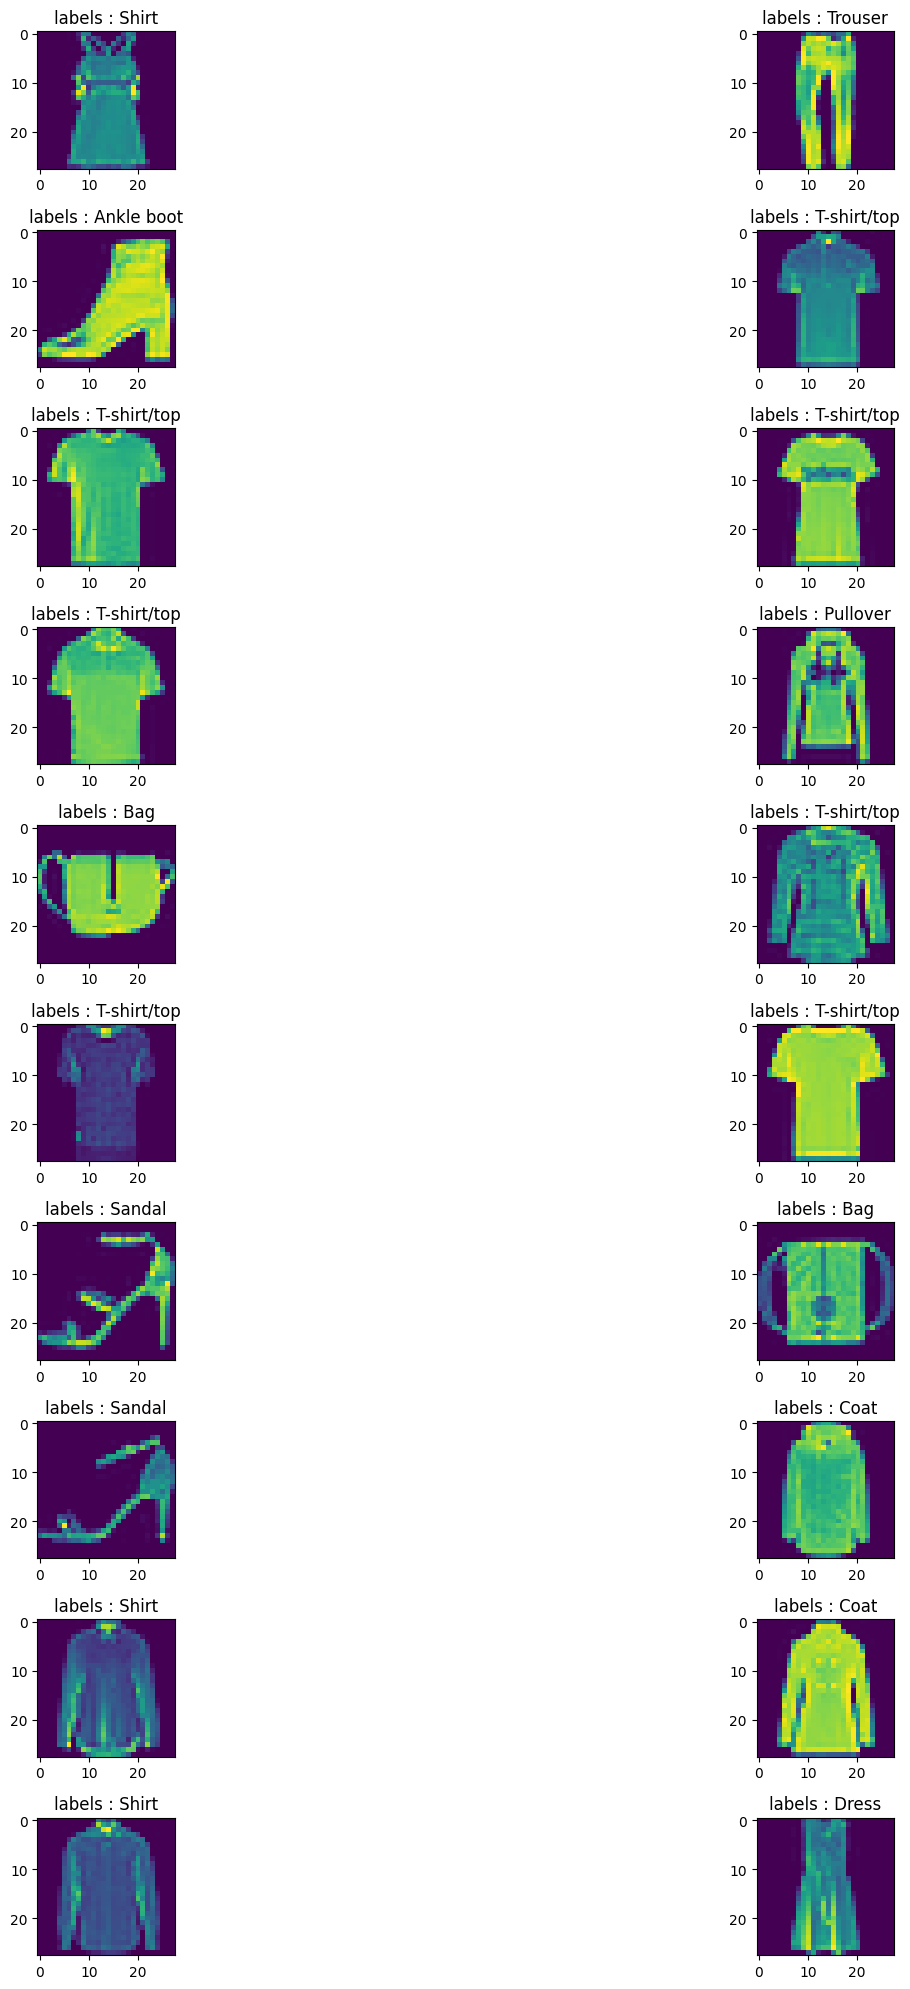

In [11]:
fig, ax = plt.subplots(len(class_n), 2)
fig.set_size_inches(20, 20)

for i in range(len(class_n)):
    for j in range(2):
        idx = random.randint(0, len(y_train))
        ax[i, j].imshow(x_train[idx])
        ax[i, j].set_title(f'labels : {labels[y_train[idx]]}')

plt.tight_layout()

### Normalize & One-HotEncoding

In [12]:
# expand_dim

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [13]:
# MinMax Scaling

max_num = x_train.max() # 255
min_num = x_train.min() # 0

x_train = (x_train - min_num) / (max_num - min_num) # x_train / 255
x_test = (x_test - min_num) / (max_num - min_num) # x_test / 255

In [14]:
x_train.max(), x_train.min(), x_test.max(), x_test.min()

(1.0, 0.0, 1.0, 0.0)

## ResNet50 Model

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
from keras.applications.resnet import ResNet50

# clear_memory
clear_session()

# input_layer
inputs = Input(shape = x_train.shape[1:])

# input_tensor = inputs
model = ResNet50(include_top = True, weights= None, input_tensor = inputs, classes = 10)   # include_top = True, classes = 10(labels.nunique), weights = None

model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 34, 34, 1)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 14, 14, 64)     │          3,200 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 14, 14, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 14, 14, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 16, 16, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 7, 7, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 7, 7, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 7, 7, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 7, 7, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 7, 7, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 7, 7, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 7, 7, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 7, 7, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 7, 7, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,601,930 (90.03 MB)

 Trainable params: 23,548,810 (89.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [17]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

history = model.fit(x_train, y_train, epochs = 100, validation_split = 0.2, callbacks = [es], batch_size = 32)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 108s 34ms/step - accuracy: 0.5130 - loss: 1.5454 - val_accuracy: 0.7630 - val_loss: 0.6721
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.7804 - loss: 0.6222 - val_accuracy: 0.8125 - val_loss: 0.5019
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.8375 - loss: 0.4554 - val_accuracy: 0.8330 - val_loss: 0.4671
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.8600 - loss: 0.3823 - val_accuracy: 0.8551 - val_loss: 0.4263
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8803 - loss: 0.3303 - val_accuracy: 0.8489 - val_loss: 0.4342
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.8876 - loss: 0.3064 - val_accuracy: 0.8628 - val_loss: 0.3925
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9043 - loss: 0.2566 - val_accuracy: 0.8596 - val_loss: 0.4389
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy:

Text(0.5, 1.0, 'Loss Curves')

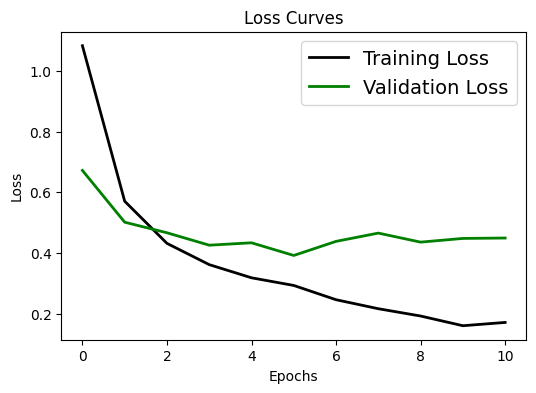

In [18]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

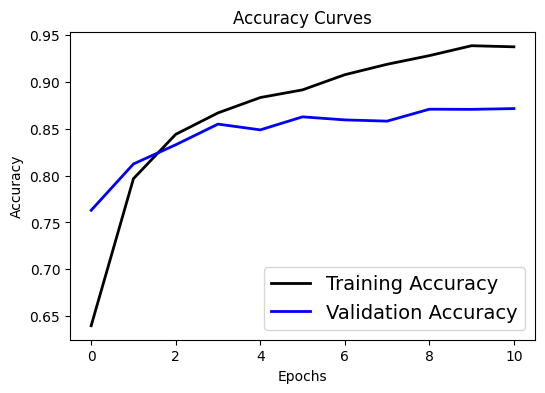

In [19]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [20]:
train_cnn_pred = model.predict(x_train)
test_cnn_pred = model.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


In [21]:
train_cnn_pred = train_cnn_pred.argmax(axis = 1)
test_cnn_pred = test_cnn_pred.argmax(axis = 1)

In [22]:
train_ResNet50_accuracy = accuracy_score(y_train, train_cnn_pred)
test_ResNet50_accuracy = accuracy_score(y_test, test_cnn_pred)

print("train_ResNet50_ccuracy :", train_ResNet50_accuracy)
print("test_ResNet50_ccuracy :", test_ResNet50_accuracy)

train_ResNet50_ccuracy : 0.898
test_ResNet50_ccuracy : 0.858


##  ResNet50 + ml

In [23]:
# model.layers[-1] = avg_pool(GlobalAveragePooling2D) == Flatten()

ResNet50_features_model = Model(inputs = model.inputs, outputs = model.layers[-1].output)

In [24]:
ResNet50_features_train = ResNet50_features_model.predict(x_train)
ResNet50_features_test = ResNet50_features_model.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [25]:
ResNet50_features_train.shape, ResNet50_features_test.shape

((60000, 10), (10000, 10))

#### ResNet50 + LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(ResNet50_features_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
train_lr_accuracy = lr_model.score(ResNet50_features_train, y_train)
test_lr_accuracy = lr_model.score(ResNet50_features_test, y_test)

print("train_lr_ccuracy :", train_lr_accuracy)
print("test_lr_ccuracy :", test_lr_accuracy)

train_lr_ccuracy : 0.90095
test_lr_ccuracy : 0.8595


#### ResNet50 + KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier()

kn_model.fit(ResNet50_features_train, y_train)

KNeighborsClassifier()

In [29]:
train_kn_accuracy = kn_model.score(ResNet50_features_train, y_train)
test_kn_accuracy = kn_model.score(ResNet50_features_test, y_test)

print("train_lr_ccuracy :", train_kn_accuracy)
print("test_lr_ccuracy :", test_kn_accuracy)

train_lr_ccuracy : 0.9176166666666666
test_lr_ccuracy : 0.8495


#### ResNet50 + RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(ResNet50_features_train, y_train)

RandomForestClassifier()

In [31]:
train_rf_accuracy = rf_model.score(ResNet50_features_train, y_train)
test_rf_accuracy = rf_model.score(ResNet50_features_test, y_test)

print("train_rf_ccuracy :", train_rf_accuracy)
print("test_rf_ccuracy :", test_rf_accuracy)

train_rf_ccuracy : 0.9999666666666667
test_rf_ccuracy : 0.8649


#### ResNet50 + LightGBM

In [32]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()

lgbm_model.fit(ResNet50_features_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 10
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585


LGBMClassifier()

In [33]:
train_lgbm_accuracy = lgbm_model.score(ResNet50_features_train, y_train)
test_lgbm_accuracy = lgbm_model.score(ResNet50_features_test, y_test)

print("train_lgbm_ccuracy :", train_lgbm_accuracy)
print("test_lgbm_ccuracy :", test_lgbm_accuracy)

train_lgbm_ccuracy : 0.9578833333333333
test_lgbm_ccuracy : 0.8606


In [34]:
print("--Training Accuracy--")
print("ResNet50 Accuracy:- {:.2f} %".format(train_ResNet50_accuracy * 100))
print("ResNet50+LogisticRegression Accuracy:- {:.2f} %".format(train_lr_accuracy * 100))
print("ResNet50+KNN Accuracy:- {:.2f} %".format(train_kn_accuracy * 100))
print("ResNet50+RandomForest Accuracy:- {:.2f} %".format(train_rf_accuracy * 100))
print("ResNet50+LightGBM Accuracy:- {:.2f} %".format(train_lgbm_accuracy * 100))
print(' ')
print("--Testing Accuracy--")
print("ResNet50 Accuracy:- {:.2f} %".format(test_ResNet50_accuracy * 100))
print("ResNet50+LogisticRegression Accuracy:- {:.2f} %".format(test_lr_accuracy * 100))
print("ResNet50+KNN Accuracy:- {:.2f} %".format(test_kn_accuracy * 100))
print("ResNet50+RandomForest Accuracy:- {:.2f} %".format(test_rf_accuracy * 100))
print("ResNet50+LightGBM Accuracy:- {:.2f} %".format(test_lgbm_accuracy * 100))

--Training Accuracy--
ResNet50 Accuracy:- 89.80 %
ResNet50+LogisticRegression Accuracy:- 90.09 %
ResNet50+KNN Accuracy:- 91.76 %
ResNet50+RandomForest Accuracy:- 100.00 %
ResNet50+LightGBM Accuracy:- 95.79 %
 
--Testing Accuracy--
ResNet50 Accuracy:- 85.80 %
ResNet50+LogisticRegression Accuracy:- 85.95 %
ResNet50+KNN Accuracy:- 84.95 %
ResNet50+RandomForest Accuracy:- 86.49 %
ResNet50+LightGBM Accuracy:- 86.06 %
